### Table of contents

#### [Step 1. Data file and studying the general information. ](#1)  
#### [Step 2. Data preprocessing.](#2)  
#### [Step 3. Calculations and adding columns  to the dataframe.](#3)
#### [Step 4. Exploratory Data Analysis.](#4)  
#### [Step 5. Overall Conclusion.](#5)  

<a id="1"></a>

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/vehicles_us.csv')
data.shape

(51525, 13)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
# top 5 sample data
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
# stats for quantitative data
data.describe().round(2)

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.00,47906.00,46265.00,43633.00,25572.0,51525.00
mean,12132.46,2009.75,6.13,115553.46,1.0,39.55
std,10040.80,6.28,1.66,65094.61,0.0,28.20
min,1.00,1908.00,3.00,0.00,1.0,0.00
25%,5000.00,2006.00,4.00,70000.00,1.0,19.00
50%,9000.00,2011.00,6.00,113000.00,1.0,33.00
75%,16839.00,2014.00,8.00,155000.00,1.0,53.00
max,375000.00,2019.00,12.00,990000.00,1.0,271.00


In [5]:
# stats for categorical data
import numpy as np
data.describe(include=np.object)

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


### Conclusion

- There are 51525 rows(ads) and 13 columns(parameters) in our dataset.

- `is_4wd` is Boolean variable (0,1) but the minimum value is 1.0 whereas it should be 0. It could be explained that all blank values have to be 0 since we have only two options for logical conditions. It could be 1 or 0.
- `price` variable has the minimum value of 1 which is illogical. We will dig deeper into that
- data types should be changed from float. to int in `model_year`, `cylinders`, `is_4wd` since they should be whole numbers.
- `odometer` has 0 values that could be interpreted as the car is new.

- `model_year`(47906 rows), `cylinders`(46265 rows), `odometer`(43633 rows), `paint_color`(42258 rows), `is_4wd`(25572 rows), columns have missing values.

- We have both quantitative(e.g.`price`, `odometer`) and qualitative(e.g.`model`, `condition`) data. 

- There are 100 vehicle models and most of them are 'ford f-150' and 'SUV'. Majority of the vehicles (24773) in our dataset are in excellent condition with automatic transmission and white color. Thats only information before its clean. We will have a look at these stats at the end of our analysis.


<a id="2"></a>

### Step 2. Data preprocessing

In [6]:
# checking for missing values 
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
# percentage of missing values in columns
share_all = (data.isnull().sum()*100/len(data)).round(2)
share_all

price            0.00
model_year       7.02
model            0.00
condition        0.00
cylinders       10.21
fuel             0.00
odometer        15.32
transmission     0.00
type             0.00
paint_color     17.99
is_4wd          50.37
date_posted      0.00
days_listed      0.00
dtype: float64

 - <b><font color="purple"> Percentage of missing values in columns </font></b>

#### `is_4wd` - Whether the vehicle has 4-wheel drive (Boolean variable)

In [8]:
# checking for unique values
data['is_4wd'].unique()

array([ 1., nan])

In [9]:
# replacing missing values
data['is_4wd'].fillna(value = 0, inplace=True)

In [10]:
# double check
data['is_4wd'].unique()

array([1., 0.])

In [11]:
# float to int for boolean type
data['is_4wd'] = data['is_4wd'].astype(int)

In [12]:
# double check
data['is_4wd'].isnull().sum()

0

- We replaced missing values in `is_4wd` column  with 0 as  Boolean type and changed data type to int since we dont need decimals for logical variables.

#### `model_year` - Manufacturing year of the car model 

In [13]:
# missing values 
data['model_year'].isnull().sum()

3619

In [14]:
# share of missing values 
missing = data['model_year'].isnull().sum()
total =  data['model_year'].notnull().sum()
share  = (missing / total)
print('Share of the missing values:{:.2%}'.format(share))

Share of the missing values:7.55%


- There are 3619 missing years in our column which is a lot. We cant simply get rid of them because we might need other info of cars in our analysis. It would be logical if we find the average year for certain car models and replace them since unique care models are manufactured at the same year.

In [15]:
# stats for model_year
data['model_year'].describe().round()

count    47906.0
mean      2010.0
std          6.0
min       1908.0
25%       2006.0
50%       2011.0
75%       2014.0
max       2019.0
Name: model_year, dtype: float64

- The oldest vehicle model in our dataset was manufactured back in 1908 which is suspicious. We will dig deeper after dealing with missing values in EDA part while focusing the outliers.
- The data type is float which can be converted to int as we need whole numbers for year's values.

In [16]:
# general info about model and manufacturing year
data.pivot_table(index='model', values='model_year', aggfunc=['mean', 'count']).round()

,mean,count
,model_year,model_year
model,,
acura tl,2008.0,224
bmw x5,2009.0,246
buick enclave,2012.0,257
cadillac escalade,2009.0,295
chevrolet camaro,2008.0,392
...,...,...
toyota sienna,2009.0,308
toyota tacoma,2009.0,769


In [17]:
# Filling missing values with  average year of car model 
data["model_year"] = data.groupby('model')['model_year'].transform(lambda grp: grp.fillna(np.mean(grp)))
data['model_year'].isnull().sum()

0

In [18]:
# converting to whole numbers and rounding them
data['model_year'] = data['model_year'].round()
data['model_year'] = data['model_year'].astype(int)

In [19]:
# double check
data['model_year'].unique()

array([2011, 2009, 2013, 2003, 2017, 2014, 2015, 2012, 2008, 2018, 2010,
       2007, 2004, 2005, 2001, 2006, 1966, 1994, 2019, 2000, 2016, 1993,
       1999, 1997, 2002, 1981, 1995, 1996, 1975, 1998, 1985, 1977, 1987,
       1974, 1990, 1992, 1991, 1972, 1967, 1988, 1969, 1989, 1978, 1965,
       1979, 1968, 1986, 1980, 1964, 1963, 1984, 1982, 1973, 1970, 1955,
       1971, 1976, 1983, 1954, 1962, 1948, 1960, 1908, 1961, 1936, 1949,
       1958, 1929])

#### `cylinders` - Number of cylinders per vehicle

In [20]:
# unique values
data['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [21]:
# share of missing values 
missing = data['cylinders'].isnull().sum()
total =  data['cylinders'].notnull().sum()
share  = (missing / total)
print('Share of the missing values:{:.2%}'.format(share))

Share of the missing values:11.37%


- It would be logical as well to fill the missing values in `cylinders` column with their average number of cylinders  per car `model` . We need to change data type to integer and round it since number of cylinders can be only whole (e.g. 6, 12, 8)

In [22]:
# Filling missing values with  average cylinders of each car model. 
data["cylinders"] = data.groupby('model')['cylinders'].transform(lambda grp: grp.fillna(np.mean(grp)))
data['cylinders'].isnull().sum()

0

In [23]:
# converting to whole numbers
data['cylinders'] = data['cylinders'].round()
data['cylinders'] = data['cylinders'].astype(int)

In [24]:
# double check
data['cylinders'].unique()

array([ 6,  4,  8,  5,  7, 10,  3,  9, 12])

#### `odometer` - The vehicle's mileage when the ad was published

In [25]:
# share of missing values 
missing = data['odometer'].isnull().sum()
total =  data['odometer'].notnull().sum()
share  = (missing / total)
print('Share of the missing values:{:.2%}'.format(share))

Share of the missing values:18.09%


In [26]:
data['odometer'].describe().round(2)

count     43633.00
mean     115553.46
std       65094.61
min           0.00
25%       70000.00
50%      113000.00
75%      155000.00
max      990000.00
Name: odometer, dtype: float64

In [27]:
# pivot table to see odometer by condition of vehicles
data.pivot_table(index='condition', values='odometer', aggfunc=['count', 'mean',]).round(2)

,count,mean
,odometer,odometer
condition,,
excellent,20973,106687.68
fair,1370,183062.23
good,17053,129919.93
like new,4014,79426.74
new,125,43476.06
salvage,98,140919.99


- According to the pivot table above, we can state `odometer` has negative correlation with `condition`. The higher the odometer, the worse is condition. We will confirm/reject our hypothesis in our further analysis in correlation coefficient.
- Following this logic, we can replace the missing values of `odometer` with the mean odometer according to their condition. 

In [28]:
# replacing missing values with average odometer of condition type vehicles,double check
data['odometer'] = data.groupby('condition')['odometer'].transform(lambda grp: grp.fillna(np.mean(grp)))
data['odometer'].isnull().sum()

0

In [29]:
# lets a have look at our pivot once again
data.pivot_table(index='condition', values='odometer', aggfunc=['count', 'mean',]).round(2)

,count,mean
,odometer,odometer
condition,,
excellent,24773,106687.68
fair,1607,183062.23
good,20145,129919.93
like new,4742,79426.74
new,143,43476.06
salvage,115,140919.99


- Number of vehicles per condition type has increased but it did not affect the mean all.

#### `paint_color` - Color of the vehicle

In [30]:
# checking for unique values
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

- White is the most common vehicle color followed by black, and silver.

In [31]:
# missing values
data['paint_color'].isnull().sum()

9267

In [32]:
# share of missing values 
missing = data['paint_color'].isnull().sum()
total =  data['paint_color'].notnull().sum()
share  = (missing / total)
print('Share of the missing values:{:.2%}'.format(share))

Share of the missing values:21.93%


- The share is quiet high. Lets find out how to fill them, what values could be the best option to replace them.

In [33]:
# stats for colors
data.groupby('condition')['paint_color'].describe()

,count,unique,top,freq
condition,,,,
excellent,20350,12,white,4716
fair,1311,12,white,284
good,16497,12,white,4015
like new,3882,12,white,949
new,121,8,white,39
salvage,97,9,white,26


- Well, there is no any firm artifact to replace missing colors for cars. We will fill the blanks with 'unknown' value since there is no any evidence.

In [34]:
# filling the missing values
data['paint_color'].fillna(value = 'unknown', inplace=True)
data['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

In [35]:
# double check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null int64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 5.1+ MB


In [36]:
# looking for duplicates
data.duplicated().sum()

0

- No missing and duplicated values left  in the dataset which is a great news. Now we can proceed to our next step.

<a id="3"></a>

### Step 3. Make calculations and add them to the table

#### `weekday` variable.  Days of the week

In [37]:
# changing data type to datetime and adding weekday column
data['date_posted'] = pd.to_datetime(data['date_posted'])
data['weekday'] = data['date_posted'].dt.day_name()

In [38]:
data['weekday'].value_counts()

Thursday     7510
Saturday     7392
Sunday       7356
Monday       7339
Friday       7334
Wednesday    7299
Tuesday      7295
Name: weekday, dtype: int64

- The ads were placed almost the same amount throughout the week, yet we can differentiate the most populous days which are Thursday and Saturday (days 3 and 5) with 7510 and 7392 number of ads consecutively.

 - <b><font color="purple"> `Weekday` column was added using day_name() method </font></b>

In [39]:
# double check to see weekday column
data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday
43575,3100,1999,ford ranger,good,6,gas,173194.0,automatic,truck,unknown,1,2019-01-28,46,Monday


#### `vehicle_age` variable. The vehicle's age (in years) when the ad was placed

In [40]:
# firstly converting to object
data['model_year'] = data['model_year'].astype(str)

# converting object to datetime
data['model_year'] = pd.to_datetime(data['model_year'])

In [41]:
# vehicle_age calculation (subtracting years), adding column
ad = data['date_posted'].dt.year
vehicle = data['model_year'].dt.year
data['vehicle_age'] = ad - vehicle

In [42]:
# double check
data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,vehicle_age
20803,10500,2016-01-01,chevrolet traverse,good,6,gas,55659.0,automatic,SUV,unknown,1,2019-01-06,18,Sunday,3


#### `average_mile` variable. The vehicle's average mileage per yea

In [43]:
# Average mile calculation, adding column to dataset
data['average_mile'] = (data['odometer'] / data['vehicle_age']).round()
data['average_mile'].describe()

count    51523.0
mean         inf
std          NaN
min          0.0
25%      10648.0
50%      15241.0
75%      22675.0
max          inf
Name: average_mile, dtype: float64

- We have infinite values most probably because some cars have 0 age so when dividing age by odometer we get infinite result. We could replace 0 values of `vehicle_age` with 1 as their first year. 

In [44]:
# replacing 0 with 1
data.loc[(data.vehicle_age == 0),'vehicle_age']= 1

In [45]:
# stats to check the change
data['vehicle_age'].describe().round(2)

count    51525.00
mean         8.60
std          6.06
min          1.00
25%          4.00
50%          8.00
75%         12.00
max        110.00
Name: vehicle_age, dtype: float64

In [46]:
# recalculation of average mile
data['average_mile'] = (data['odometer'] / data['vehicle_age']).round()
data['average_mile'].describe().round()

count     51525.0
mean      18935.0
std       16434.0
min           0.0
25%       10441.0
50%       15000.0
75%       21655.0
max      373200.0
Name: average_mile, dtype: float64

- The average mileage per year per vehicle is 18935.

In [47]:
# double check for new column
data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,vehicle_age,average_mile
14098,8995,2005-01-01,toyota tundra,good,8,gas,129919.93098,automatic,pickup,red,1,2018-10-13,27,Saturday,13,9994.0


#### `condition` variable. Condition of the variable when the ad was published.
###### In the `condition` column, replace string values with a numeric scale

In [48]:
# unique values of variable
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [49]:
# assigning numerical values to condition column.

new = 5
like = 4
excellent = 3
good = 2
fair = 1
salvage = 0

def value(condition):
    if 'like' in condition:
        return  like
    if 'new' in condition:
        return new
    if 'excellent' in condition:
        return excellent
    if 'good' in condition:
        return  good
    if 'fair' in condition:
        return  fair
    if 'salvage' in condition:
        return salvage
    return 'unknown'
data['condition'] = data['condition'].apply(value)
data['condition'].unique()

array([2, 4, 1, 3, 0, 5])

In [50]:
# to check condition values
data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,vehicle_age,average_mile
48627,5995,2010-01-01,nissan altima,2,4,gas,118229.0,automatic,sedan,unknown,0,2019-01-13,48,Sunday,9,13137.0


### Conclusion

 <b><font color=purple >- We have calculated weekdays and added new column `weekday` of these values to our dataframe. `vehicle_age` column was added by calculating the age of vehicle when the ad was published. And finally third column `average_mile` was added to our dataset by finding the yearly mileage per vehicle. 
 - `condition` variable values were converted to number starting from 0-5 which is worse to best respectively.<font></b>

<a id="4"></a>

### Step 4. Carry out exploratory data analysis

##### Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

#### `price` Variable data and Histogram

In [51]:
from matplotlib import pyplot as plt

In [52]:
total_ad = data.shape[0]
print('Number of ads:', total_ad)
total_models = len(data['model'].unique())
print('Number of unique car models:', total_models)
total_days = 7
ads_per_day = total_ad / total_models / total_days
print('Number of ads per car model per day:{:.0f}'.format(ads_per_day))

Number of ads: 51525
Number of unique car models: 100
Number of ads per car model per day:74


In [53]:
data['model'].value_counts().sort_values(ascending=False)

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

- People are willing to sell 'ford f-150' and 'chevrolet silverado 1500' most of the time. Let's have a glance at car prices.

In [54]:
# cheapest and the most expensive vehicles
cheap = data['price'].min()
print('The cheapest vehicle:', cheap)
expensive = data['price'].max()
print('The most expensive vehicle:', expensive)

The cheapest vehicle: 1
The most expensive vehicle: 375000


- The price of car is 1 USD is unrealistic, clearly there is a mistake, it could be typo error. Whereas the highest price for a car is 375,000 USD which quite high. Let us take a look at grapsh to see the overall distribution of car prices.

In [55]:
# price stats
data['price'].describe().round(2)

count     51525.00
mean      12132.46
std       10040.80
min           1.00
25%        5000.00
50%        9000.00
75%       16839.00
max      375000.00
Name: price, dtype: float64

Text(0, 0.5, 'Number of vehicles')

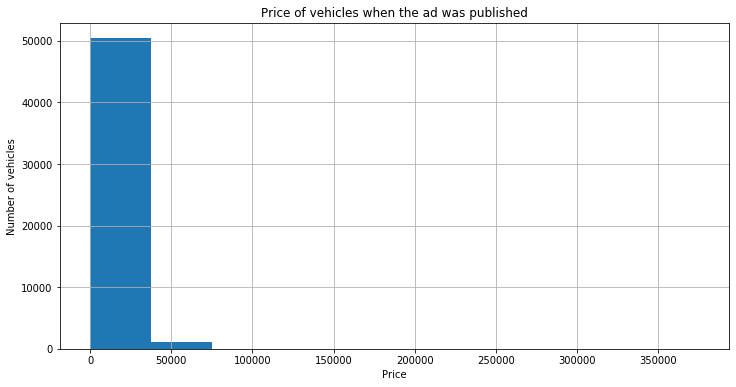

In [56]:
data.hist('price', figsize=(12,6))
plt.title('Price of vehicles when the ad was published')
plt.xlabel('Price')
plt.ylabel('Number of vehicles')

- The price of cars is on the x-axis, and number of cars = y-axis. 75% of car prices lie between 0-17k USD. We have to look at the range (0, 80k) since almost all the data is between this range.

Text(0, 0.5, 'Number of vehicles')

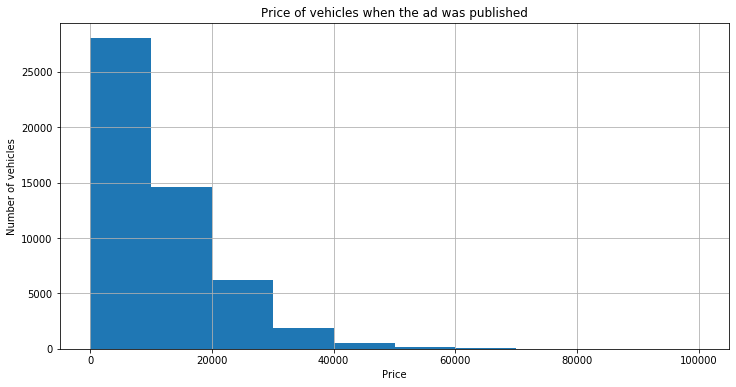

In [57]:
data.hist('price', range=(0,100000), figsize=(12,6))
plt.title('Price of vehicles when the ad was published')
plt.xlabel('Price')
plt.ylabel('Number of vehicles')

- From the histogram above we can see most of the cars' value lie between 0-20k although the average price per vehicle is 12k USD. The median is 9k, clearly there are outliers that push the mean up. Vehicles with the price above 70k can be removed from the dataset.
- There are also values starting from 0. Lets zoom in to see whether they are outliers as well.

Text(0, 0.5, 'Number of vehicles')

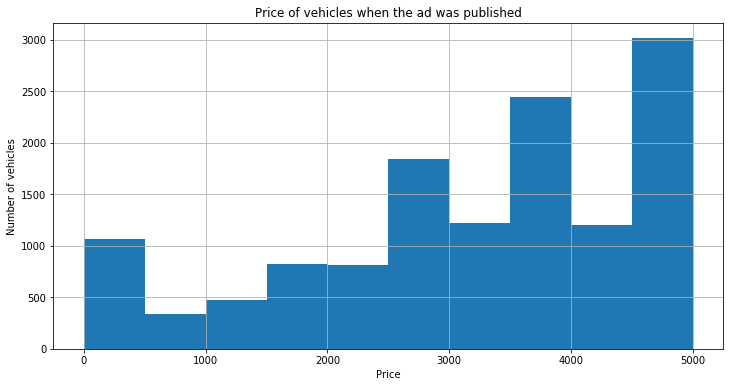

In [58]:
data.hist('price',  range=(0,5000), figsize=(12,6))
plt.title('Price of vehicles when the ad was published')
plt.xlabel('Price')
plt.ylabel('Number of vehicles')

- There are more than 800 cars whose prices are from 0 to 100 which is unrealistic to car prices. Its weird to see peak at 0, right?
- Prices from 0-1000, and above 60k most probably are group of outliers

#### `vehicle_age` Variable data and Histogram

In [59]:
# stats for vehicle_age
data['vehicle_age'].describe().round()

count    51525.0
mean         9.0
std          6.0
min          1.0
25%          4.0
50%          8.0
75%         12.0
max        110.0
Name: vehicle_age, dtype: float64

- There average year of vehicles when the ad was published is 9 years. The maximum is 110 years, seems weird, right?

Text(0, 0.5, 'Number of vehicles')

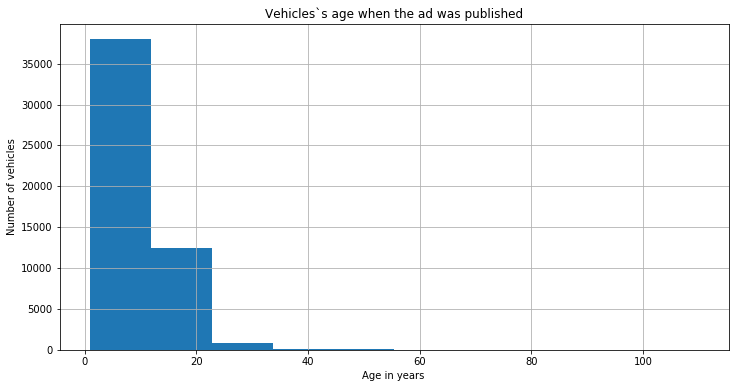

In [60]:
data.hist('vehicle_age', figsize=(12,6))
plt.title('Vehicles`s age when the ad was published')
plt.xlabel('Age in years ')
plt.ylabel('Number of vehicles')

- There is a peak at 0 again here that tells us about the year and condition of the cars when the ad was published. Ages above 40 lie further from majority
- From the histogram above, we can see that most of the cars' age is between 0-20. 75% of the cars' are from 0 to 12 years old. We can zoom in, range(0, 60) as there is no data above 60 years that could affect our analysis. 

#### `average_mile` variable. Histogram

In [61]:
# stats for annual mileage of cars
data['average_mile'].describe().round()

count     51525.0
mean      18935.0
std       16434.0
min           0.0
25%       10441.0
50%       15000.0
75%       21655.0
max      373200.0
Name: average_mile, dtype: float64

Text(0, 0.5, 'Number of vehicles')

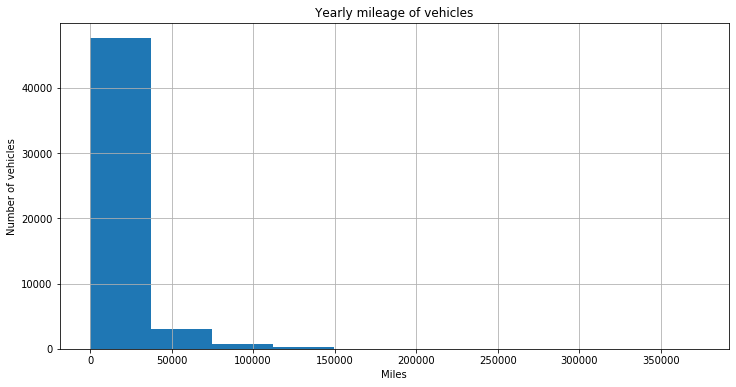

In [62]:
data.hist('average_mile', figsize=(12,6))
plt.title('Yearly mileage of vehicles')
plt.xlabel('Miles')
plt.ylabel('Number of vehicles')

- Graphs show that each variables have outliers in the dataset. Average mile above 100k are out of interest as they dont make any difference but affect overall average.

#### `cylinders` variable. Number of cylinders per car

In [63]:
data['cylinders'].describe().round()

count    51525.0
mean         6.0
std          2.0
min          3.0
25%          4.0
50%          6.0
75%          8.0
max         12.0
Name: cylinders, dtype: float64

- Every second vehicle in the dataset has 6 cylinders.

Text(0, 0.5, 'Number of vehicles')

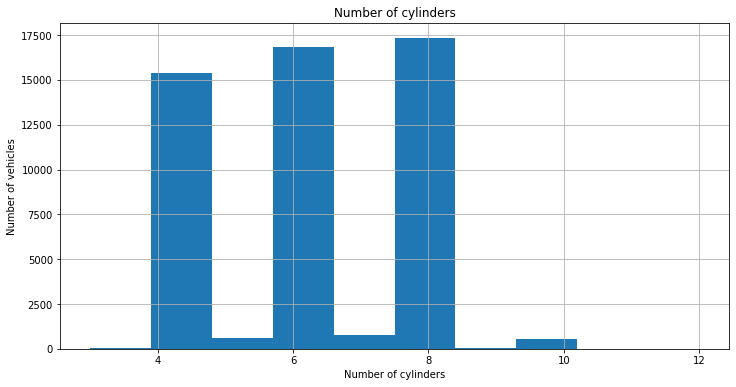

In [64]:
data.hist('cylinders', figsize=(12,6))
plt.title('Number of cylinders')
plt.xlabel('Number of cylinders')
plt.ylabel('Number of vehicles')

- Most of the cars have 4,6,8 cylinders in our dataset.

In [65]:
# unique values
data['cylinders'].value_counts()

8     17326
6     16811
4     15397
7       773
5       602
10      549
3        34
9        31
12        2
Name: cylinders, dtype: int64

- Only 2 vehicles have 12 cylinders.

#### `condition` variable. Condition of vehicle when the ad was published

Text(0, 0.5, 'Number of vehicles')

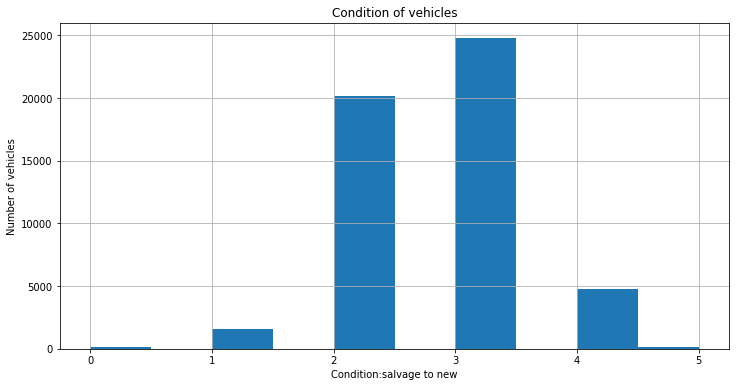

In [66]:
data.hist('condition', range=(0,5), figsize=(12,6))
plt.title('Condition of vehicles')
plt.xlabel('Condition:salvage to new')
plt.ylabel('Number of vehicles')

In [67]:
# stats for condition. numeric
data['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

- Most of the cars in our dataset have 2 and 3 conditions which are good and excellent respectively. Number of vehicles with salvage condition is the least 115 in our dataset.

##### Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

##### Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

#### `price` variable

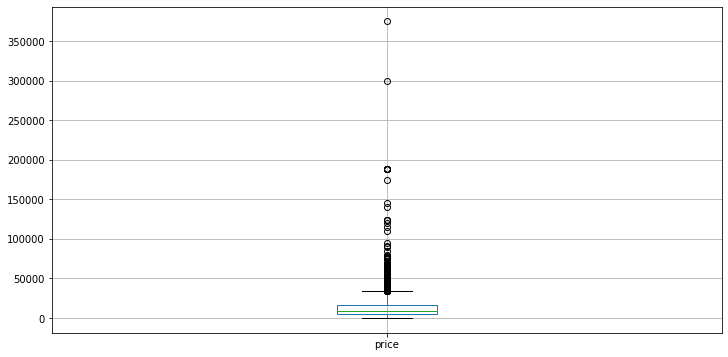

In [68]:
# detecting otliers using box plot
data.boxplot(column=['price'], figsize=(12,6))

In [69]:
# removing outliers with IQR score method
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
filtered_price = data.query('price > @Q1_price - 1.5 * @IQR_price and price < @Q3_price + 1.5 * @IQR_price')
print(filtered_price['price'].describe().round(2))

count    49879.00
mean     11095.56
std       7806.52
min          1.00
25%       4995.00
50%       8990.00
75%      15900.00
max      34595.00
Name: price, dtype: float64


Text(0, 0.5, 'Number of vehicles')

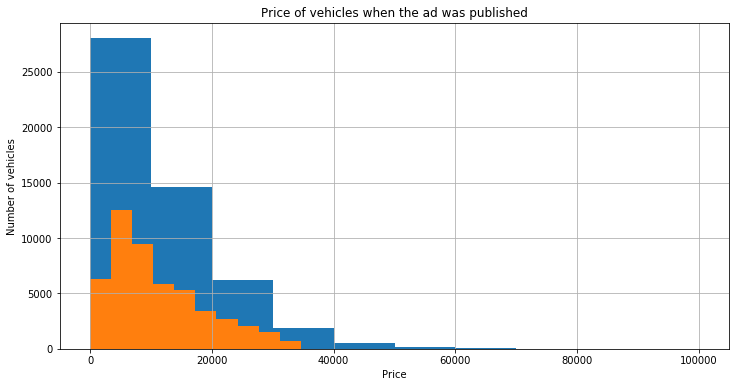

In [70]:
# histograms before vs after removing outliers
data['price'].hist(figsize=(12,6), range=(0,100000))
filtered_price['price'].hist(figsize=(12,6))
plt.title('Price of vehicles when the ad was published')
plt.xlabel('Price')
plt.ylabel('Number of vehicles')

#### Conclusion

<b> <font color=purple>After getting rid of outliers we can observe the shift to the left and more dense data within 0-18000 price range. Now the average price per vehicle is 11,095. 

#### `vehicle_age` variable

In [71]:
# removing outliers with IQR score method
Q1_vehicle_age = filtered_price['vehicle_age'].quantile(0.25)
Q3_vehicle_age = filtered_price['vehicle_age'].quantile(0.75)
IQR_vehicle_age = Q3_vehicle_age - Q1_vehicle_age
filtered_vehicle = filtered_price.query('vehicle_age > @Q1_vehicle_age - 1.5 * @IQR_vehicle_age and vehicle_age < @Q3_vehicle_age + 1.5 * @IQR_vehicle_age')
print(filtered_vehicle['vehicle_age'].describe().round(2))

count    49025.00
mean         8.36
std          4.99
min          1.00
25%          4.00
50%          8.00
75%         12.00
max         23.00
Name: vehicle_age, dtype: float64


Text(0, 0.5, 'Number of vehicles')

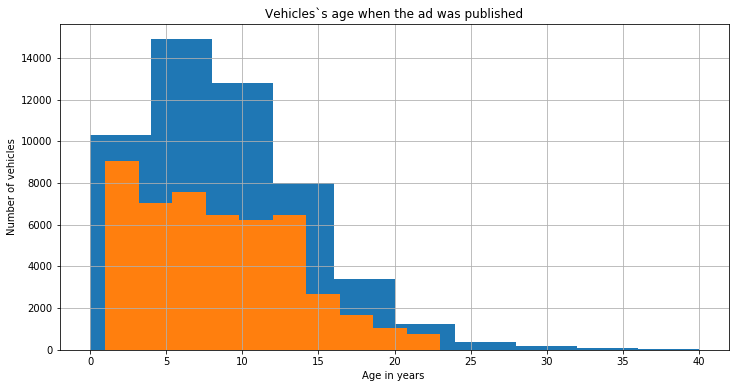

In [72]:
data['vehicle_age'].hist(figsize=(12,6), range=(0,40))
filtered_vehicle['vehicle_age'].hist(figsize=(12,6))
plt.title('Vehicles`s age when the ad was published')
plt.xlabel('Age in years ')
plt.ylabel('Number of vehicles')

#### Conclusion

<b><font color=purple>In this histogram we see that the it shifted to the left where the majority of vehicles have age in 0-14 range. And the oldest vehicle now is 23.

#### `average_mile` variable

In [73]:
# removing outliers with IQR score method
Q1_mile = filtered_vehicle['average_mile'].quantile(0.25)
Q3_mile = filtered_vehicle['average_mile'].quantile(0.75)
IQR_mile = Q3_mile - Q1_mile
filtered_mile = filtered_vehicle.query('average_mile > @Q1_mile - 1.5 * @IQR_mile and average_mile < @Q3_mile + 1.5 * @IQR_mile')
print(filtered_mile['average_mile'].describe().round(2))

count    45627.00
mean     15580.44
std       7585.27
min          0.00
25%      10319.50
50%      14436.00
75%      19885.00
max      38092.00
Name: average_mile, dtype: float64


Text(0, 0.5, 'Number of vehicles')

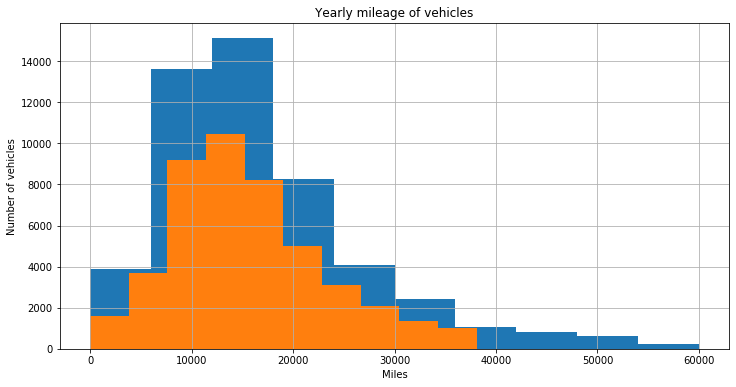

In [74]:
# plotting histograms
data['average_mile'].hist(figsize=(12,6), range=(0,60000))
filtered_mile['average_mile'].hist(figsize=(12,6))
plt.title('Yearly mileage of vehicles')
plt.xlabel('Miles')
plt.ylabel('Number of vehicles')

#### Conclusion

<b><font color=purple> - Again the density in our histogram became much higher. Peak almost halved. Majority of the data lies between 5k-20k range mileage.

#### `cylinders` variable

In [75]:
# removing outliers with IQR score method
Q1_cylinder = filtered_mile['cylinders'].quantile(0.25)
Q3_cylinder = filtered_mile['cylinders'].quantile(0.75)
IQR_cylinder = Q3_cylinder - Q1_cylinder
filtered_cylinder = filtered_mile.query('cylinders > @Q1_cylinder - 1.5 * @IQR_cylinder and cylinders < @Q3_cylinder + 1.5 * @IQR_cylinder')
print(filtered_cylinder['cylinders'].d
      escribe().round(2))
print(data['cylinders'].describe().round(2))

count    45627.00
mean         6.07
std          1.64
min          3.00
25%          4.00
50%          6.00
75%          8.00
max         12.00
Name: cylinders, dtype: float64
count    51525.00
mean         6.12
std          1.65
min          3.00
25%          4.00
50%          6.00
75%          8.00
max         12.00
Name: cylinders, dtype: float64


Text(0, 0.5, 'Number of vehicles')

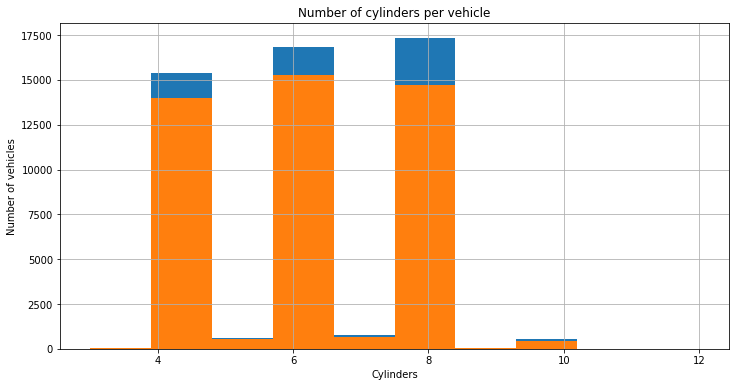

In [76]:
# plotting histograms
data['cylinders'].hist(figsize=(12,6))
filtered_cylinder['cylinders'].hist(figsize=(12,6))
plt.title('Number of cylinders per vehicle')
plt.xlabel('Cylinders')
plt.ylabel('Number of vehicles')

<b><font color=purple>- We can observe that only number of vehicles has reduced mainly due to removed outliers of other columns with different parameters.

#### `condition` variable

In [77]:
# removing outliers with IQR score method
Q1_condition = filtered_cylinder['condition'].quantile(0.25)
Q3_condition = filtered_cylinder['condition'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition
filtered_data = filtered_cylinder.query('condition > @Q1_condition - 1.5 * @IQR_condition and condition < @Q3_condition + 1.5 * @IQR_condition')
print(filtered_data['condition'].describe().round(2))

count    45440.00
mean         2.62
std          0.68
min          1.00
25%          2.00
50%          3.00
75%          3.00
max          4.00
Name: condition, dtype: float64


Text(0, 0.5, 'Number of vehicles')

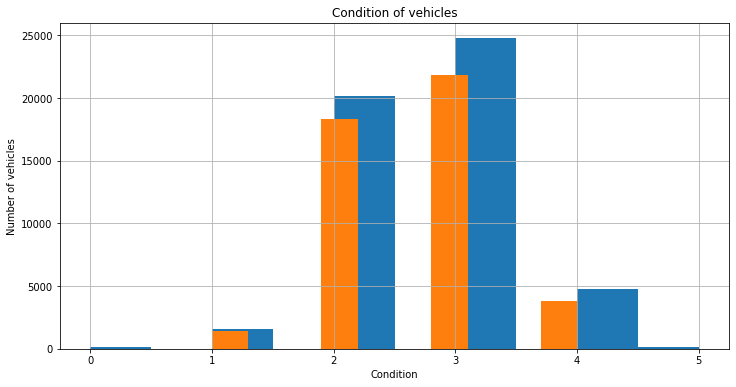

In [78]:
# plotting histograms
data['condition'].hist(figsize=(12,6))
filtered_data['condition'].hist(figsize=(12,6))
plt.title('Condition of vehicles')
plt.xlabel('Condition')
plt.ylabel('Number of vehicles')

<b><font color=purple >- Its interesting that the graph shifted to the left where the number of vehicles per each condition decreased.</font>

##### Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time

#### `days_listed` variable. Number of days from publication to removal

In [79]:
# info about filtered data
filtered_data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,vehicle_age,average_mile
36478,16799,2014-01-01,chevrolet silverado 1500,3,8,gas,106687.682258,automatic,truck,red,1,2018-06-11,11,Monday,4,26672.0


In [80]:
# median and mean for days listed
mean = filtered_data['days_listed'].mean().round(2)
median = filtered_data['days_listed'].median().round(2)
print(filtered_data['days_listed'].describe().round(2))
print('Mean ad stay duration:', mean)
print('Median ad stay duration:', median)

count    45440.00
mean        39.54
std         28.23
min          0.00
25%         19.00
50%         33.00
75%         53.00
max        271.00
Name: days_listed, dtype: float64
Mean ad stay duration: 39.54
Median ad stay duration: 33.0


In [81]:
# filtering days by cars' condition
filtered_data.groupby('condition')['days_listed'].mean().round(2)

condition
1    38.84
2    39.48
3    39.70
4    39.11
Name: days_listed, dtype: float64

- Idea is that the duration of ad is related to the condition of the product which is sold.

Text(0, 0.5, 'Number of vehicles')

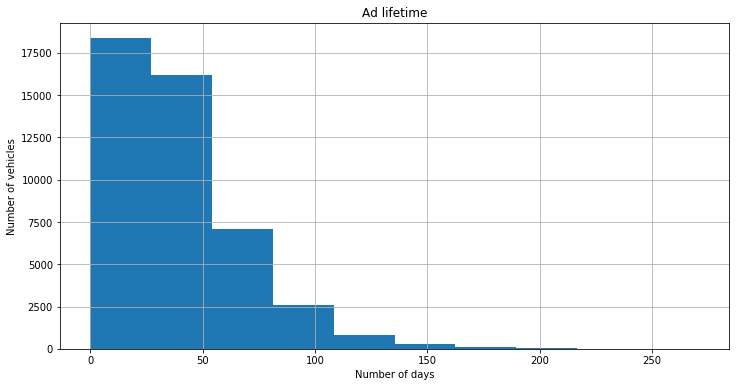

In [82]:
# Lifetime of ad
filtered_data['days_listed'].plot(kind='hist',figsize=(12,6), grid=True)
plt.title('Ad lifetime')
plt.xlabel('Number of days')
plt.ylabel('Number of vehicles')

- On average the ad stays on the web site for 39.54 days. Every second car which is advertised on the website stays for the duration of 33 days (50%). Mean is higher than the median that could be explained that there are some cars which stay for quiet long time (outliers) that force mean to the top. Let us have a look at the cars which stayed for abnormally long time.

Text(0, 0.5, 'Average days')

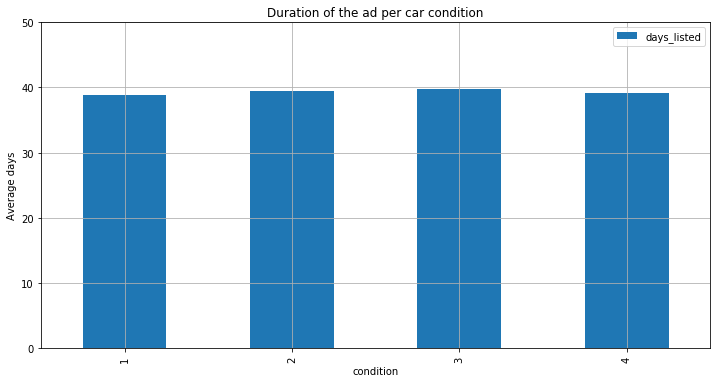

In [83]:
filtered_data.groupby('condition')['days_listed'].mean().plot(kind='bar', figsize=(12,6), grid=True, ylim=(0,50), legend=True)
plt.title('Duration of the ad per car condition')
plt.ylabel('Average days')

- According to the graph, the average day for advertisement of new vehicle is shorter than any other vehicle condition. If the car's condition is salvage(condition=0), it has the longest average ad days in our dataset.

- Note: days_listed with `condition` variable which is categorical, we used bar chart.

##### Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

#### `type`  variable. Type of vehicle

In [84]:
# unique values of the variable
filtered_data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'hatchback', 'van',
       'wagon', 'mini-van', 'convertible', 'other', 'offroad', 'bus'],
      dtype=object)

In [85]:
filtered_data.shape

(45440, 16)

In [86]:
# number of ads
filtered_data['type'].value_counts()

SUV            11259
sedan          11143
truck          10424
pickup          5955
coupe           1894
wagon           1466
mini-van        1068
hatchback        945
van              543
convertible      327
other            216
offroad          179
bus               21
Name: type, dtype: int64

In [87]:
# average price for each type of vehicle
filtered_data.groupby('type')['price'].mean().sort_values(ascending=False).round(2)

type
bus            18107.43
truck          14456.94
pickup         14311.01
offroad        13812.94
convertible    12948.64
coupe          12864.17
SUV            10026.85
other           9917.45
wagon           8661.45
van             8272.92
mini-van        7533.33
sedan           6637.01
hatchback       6507.11
Name: price, dtype: float64

Text(0, 0.5, 'number of vehicle')

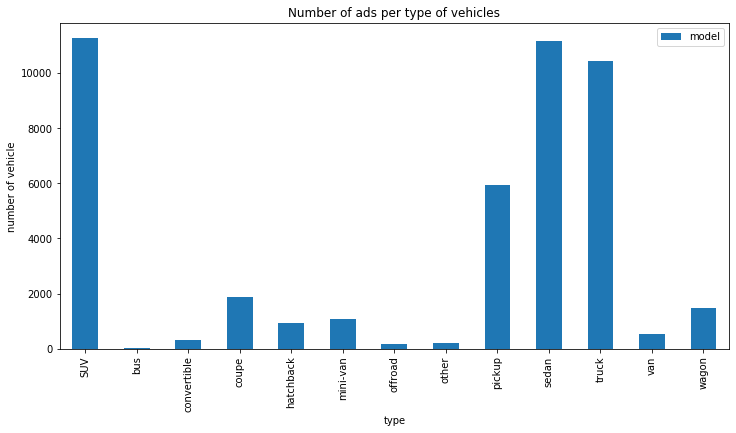

In [88]:
# number of ads depedning on vehicle type.
filtered_data.pivot_table(index='type', values='model', aggfunc= 'count').plot(kind='bar', title='Number of ads per type of vehicles', figsize=(12,6))
plt.ylabel('number of vehicle')

<b><font color=purple> - SUV and sedan are advertised the most among other types of vehicles amounted to 11,259 and 11,143 times respectively. Obvioulsy, number of ads depends on the vehicle type.

In [89]:
# storing top 2 types in new df
top1 = filtered_data.query('type == "SUV"')
top2 = filtered_data.query('type=="sedan"')
top_two = top1.merge(top2, how='outer')
top_two['type'].unique()

array(['SUV', 'sedan'], dtype=object)

##### What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

In [90]:
top1.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,vehicle_age,average_mile
10231,8400,1996-01-01,chevrolet suburban,4,8,gas,166.0,automatic,SUV,unknown,1,2018-08-24,59,Friday,22,8.0


In [91]:
# correlation coefficient price depending on vehicle_age
suv_age = top1['price'].corr(top1['vehicle_age']).round(2)
sedan_age = top2['price'].corr(top2['vehicle_age']).round(2)
print('Correlation coefficient for SUV vehicle:', suv_age)
print('Correlation coefficient for sedan:', sedan_age)

Correlation coefficient for SUV vehicle: -0.57
Correlation coefficient for sedan: -0.61


<function matplotlib.pyplot.show(*args, **kw)>

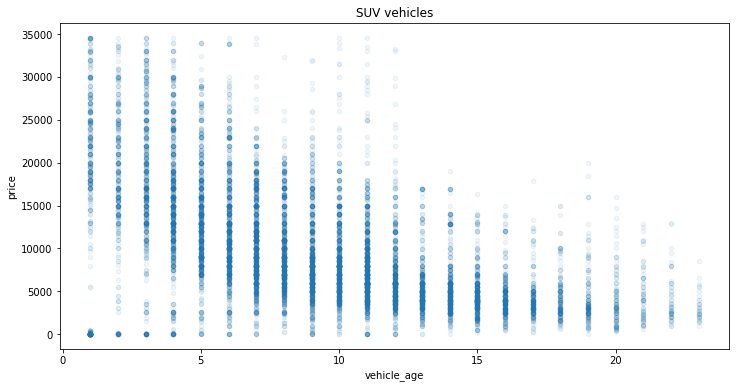

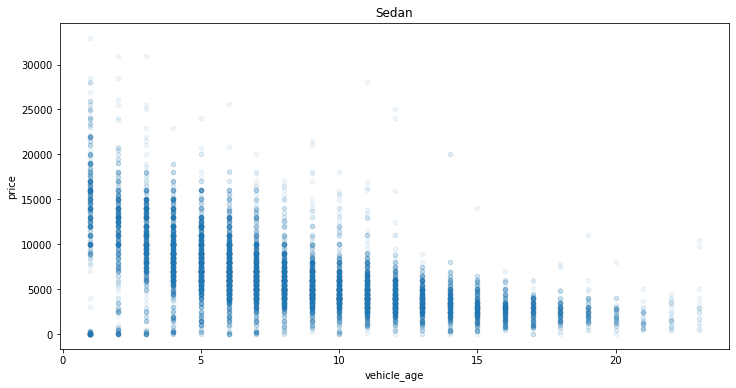

In [92]:
#scatter plot
top1.plot(x='vehicle_age', y='price', kind='scatter', alpha= 0.07, title= 'SUV vehicles', figsize=(12,6))
top2.plot(x='vehicle_age', y ='price', kind='scatter', alpha=0.07, title='Sedan', figsize=(12,6))
plt.show

- Price and vehicle's age have strong negative correlation which is logical. As the vehicle's age increases its price decreases. Age of sedan vehicles has stronger negative impact on its price than the age of SUV to its price.

In [93]:
# correlation coefficient; price depending on mileage
suv_mile = top1['price'].corr(top1['average_mile']).round(2)
sedan_mile = top2['price'].corr(top2['average_mile']).round(2)
print('Correlation coefficient for SUV vehicle:', suv_mile)
print('Correlation coefficient for sedan:', sedan_mile)

Correlation coefficient for SUV vehicle: 0.25
Correlation coefficient for sedan: 0.19


<function matplotlib.pyplot.show(*args, **kw)>

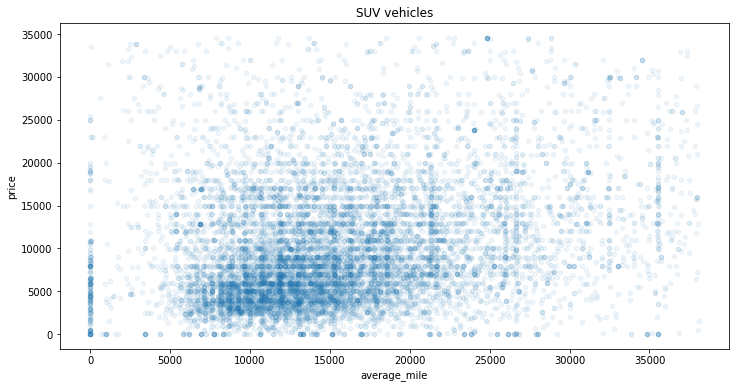

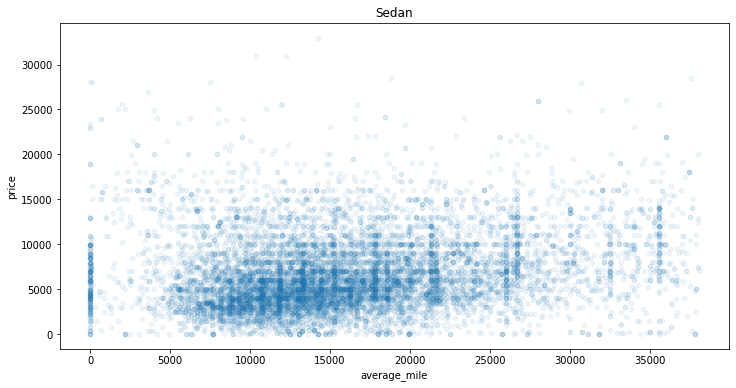

In [94]:
# scatter plot: price depending on mileage
top1.plot(x='average_mile', y='price', kind='scatter', alpha= 0.07, title= 'SUV vehicles', figsize=(12,6))
top2.plot(x='average_mile', y ='price', kind='scatter', alpha=0.07, title='Sedan', figsize=(12,6))
plt.show

- Its quiet interesting that there is a low but still positive correlation between price and average mile for SUV vehicles. There is very weak correlation (0.19) coefficient for sedan vehicles. From the scatter plots above, we can observe that the average mile of SUV  play higher role for assessing the price of vehicle than sedan vehicles. 

In [95]:
# correlation coef price depending on vehicle condition
suv_condition = top1['price'].corr(top1['condition']).round(2)
sedan_condition = top2['price'].corr(top2['condition']).round(2)
print('Correlation coefficient for SUV vehicle:', suv_condition)
print('Correlation coefficient for Sedan:', sedan_condition)

Correlation coefficient for SUV vehicle: 0.27
Correlation coefficient for Sedan: 0.3


In [96]:
top_two['condition'].value_counts()

3    11552
2     8126
4     2134
1      590
Name: condition, dtype: int64

- There is no data about vehicles with condition 0=salvage and 5 =new. We will draw scatter plot excluding these conditions

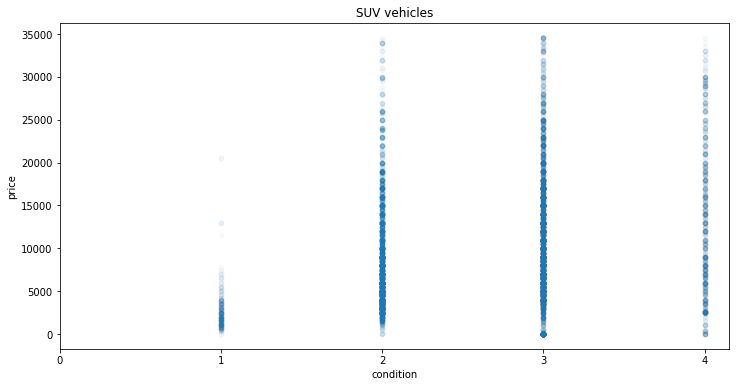

<function matplotlib.pyplot.show(*args, **kw)>

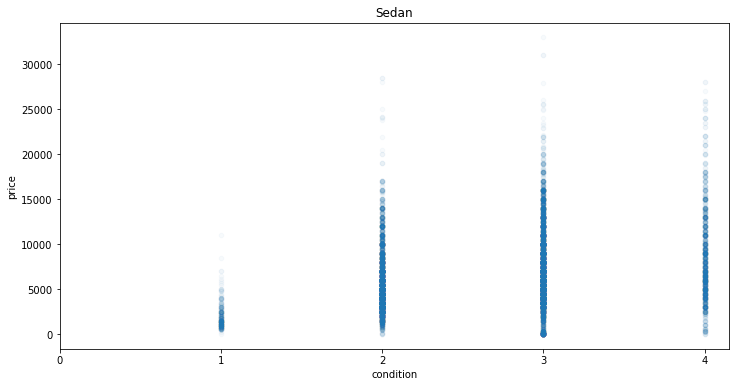

In [97]:
# scatter plot: price depending on vehicle condition
top1.query('condition != 0 and condition != 5').plot(x='condition', y='price', kind='scatter', alpha= 0.03, title= 'SUV vehicles',figsize=(12,6))
plt.xticks(np.arange(0, 5, 1))
plt.show()

# scatter plot: price depending on vehicle condition
top2.query('condition !=0 and condition !=5').plot(x='condition', y ='price', kind='scatter', alpha=0.03, title='Sedan', figsize=(12,6))
plt.xticks(np.arange(0, 5, 1))
plt.show

- There is rather weak positive correlation between price and its condition for both vehicle type. Sedan's price has higher dependence on its condition rather than SUV vehicles. The better condition the higher the price. 

In [98]:
# price depending on vehicle color
# checking for unique values to see we have sufficient data to analyse.
top_two['paint_color'].value_counts()

unknown    4019
black      3560
silver     3340
white      3113
grey       2553
blue       2126
red        1722
green       609
brown       598
custom      553
orange       82
purple       64
yellow       63
Name: paint_color, dtype: int64

- The least advertised vehicle color is yellow but still we can analyse it has sufficient ad number (minimum=50).

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Box plot - SUV


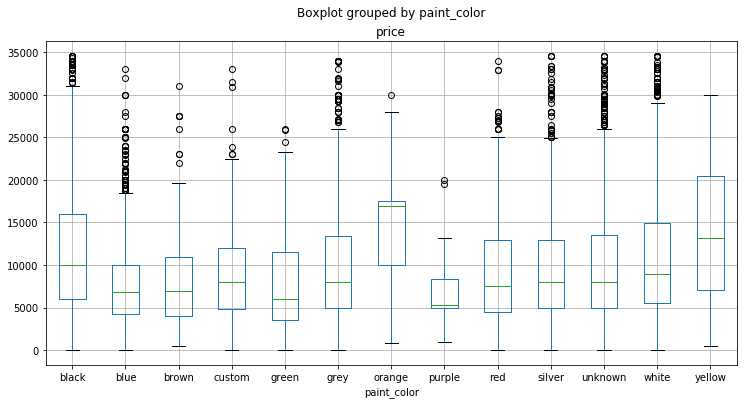

In [99]:
# boxplot for categorical variables: paint_color
suv_color = top1.boxplot(column=['price'], by='paint_color', figsize=(12,6))
print('Box plot - SUV')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Box plot - Sedan


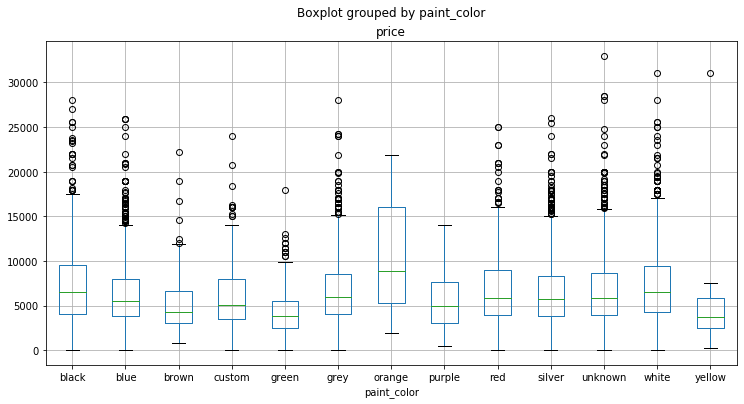

In [100]:
sedan_color = top2.boxplot(column=['price'], by='paint_color', figsize=(12,6))
print('Box plot - Sedan')

 - On the box plots above both for sedan and SUV vehicles, we can see price distribution by vehicle color. For both our most advertised vehicles, the distribution of median, which illustrated on the box plot itself, price is not symmetrical, especially for colors:black, yellow, white meaning some colors(e.g. yellow color for SUV, vehicles have higher price range than other color of vehicles).Purple and blue have short box plots meaning the price distribution is smaller, whereas black and yellow colors have comparatively taller box plots that indicates larger price distribution. In contrast, if we look at sedan's orange color, it has the highest price range with upper quantile meaning majority of price distrubition is higher than other colors.To conclude, given all the info above, the vehicle color affects the price depending on vehicle type as well.
 - For example for Sedan vehicles (corr. coef= 0.3) color affects price more than SUV vehicle's price.

In [101]:
# SUV unique transmission type
top1['transmission'].value_counts()

automatic    10672
manual         455
other          132
Name: transmission, dtype: int64

In [102]:
# truck unique transmission type
top2['transmission'].value_counts()

automatic    10472
manual         562
other          109
Name: transmission, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Box plot - SUV


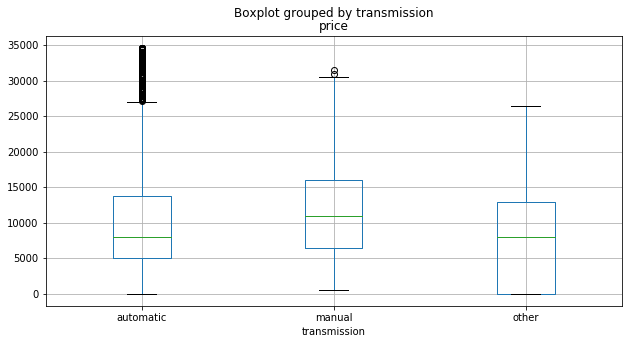

In [103]:
# boxplot for categorical variables: transmission type
suv_transmission = top1.boxplot(column=['price'], by='transmission', figsize=(10,5))
print('Box plot - SUV')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Box plot - Sedan


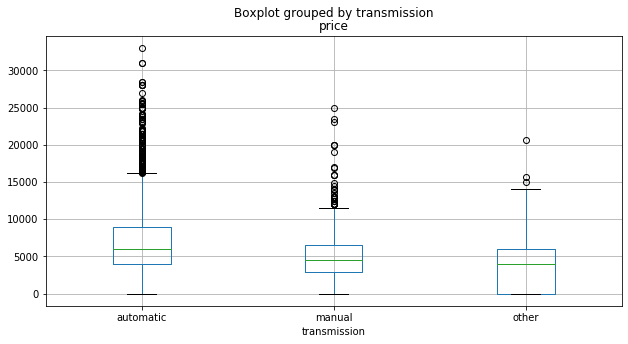

In [104]:
sedan_transmission = top2.boxplot(column=['price'], by='transmission', figsize=(10,5))
print('Box plot - Sedan')

 - For both types of vehicle, automatic transmission has more outliers than other types of transmission. It could be stated that first of all, the number of cars with automatic type is too big and prices differ from each other substantially.  Manual transmission for SUV vehicles has much higher price distribution and bigger box plot than sedan vehicles.

- 'Other' type of transmission has the lowest price range for both types of vehichles. This could be explained because automatic transmission dominates the market and demand for different types of transmission will be lower. 

- Overall, the price of vehicles depends on both transmission type and vehicle types. Example above shows transmission type has higher impact on SUV' price rather than sedan's price.

In [105]:
# filtered_data, general conclusion
filtered_data.describe().round(2)

,price,condition,cylinders,odometer,is_4wd,days_listed,vehicle_age,average_mile
count,45440.00,45440.00,45440.00,45440.0,45440.00,45440.00,45440.00,45440.00
mean,10733.90,2.62,6.07,117896.2,0.49,39.54,8.84,15593.83
std,7585.74,0.68,1.64,58369.9,0.50,28.23,4.83,7578.50
min,1.00,1.00,3.00,0.0,0.00,0.00,1.00,0.00
25%,4995.00,2.00,4.00,80849.5,0.00,19.00,5.00,10333.00
50%,8500.00,3.00,6.00,114587.0,0.00,33.00,8.00,14436.00
75%,14995.00,3.00,8.00,150356.0,1.00,53.00,12.00,19893.25
max,34595.00,4.00,12.00,710000.0,1.00,271.00,23.00,38092.00


In [106]:
# stats for general conclusion
filtered_data.describe(include=np.object)

,model,fuel,transmission,type,paint_color,weekday
count,45440,45440,45440,45440,45440,45440
unique,99,5,3,13,13,7
top,ford f-150,gas,automatic,SUV,white,Thursday
freq,2456,42162,41528,11259,8461,6652


<a id="5"></a>

### <font color=purple> Step 5. Overall conclusion </font>

<div class="alert alert-info">The ultimate goal of our analysis was to find out <b>the factors that influence the price of the vehicle. </b> We had some raw data on different features of the vehicle.

<b>Description of the data:</b><br>
    
    
`price`: the price of the vehicle <div>
`model_year`: a year the model of the vehicle was produced <div>
`model`: the model of the vehicle <div>
`condition`: the condition of the vehicle when the ad was published <div>
`cylinders`: Number of cylinders. The cylinder is the power unit of the engine. This is where fuel is burned and converted into mechanical energy that powers the vehicle <div>
`fuel`: Type of the fuel. The fuel is used to provide power to motor vehicles <div>
`odometer`: Mileage of vehicles <div>
`transmission`: Type of transmission. <div>
`paint color`: the color of the vehicle <div>
`is_4wd`: whether the vehicle has four wheel drive(Boolean type) <div>
`date posted`: the date when the ad was published <div>
`days listed`: days from ad publication to it's removal <div><br>

<div> Before jumping right into analysis, we had to do data preprocessing, getting the dataset cleaned and accurate. The dataset has all three types of variables, quantitative, categorical and logical.
The data cleaning was started by filling gaps by appropriate columns' average(e.g. average year of each model was implemented to fill missing values in `model_year`) column, missing values (NaN values in `is_4wd` were filled by 0 values as the variable had Boolean type values), illogical values(e.g. 1 price per vehicle) were dealt during EDA - removing outliers process.There were no any duplicates found in our dataframe.<br> 
Throughout the process, we have made some calculations and added new columns to the dataframe, new dataframes without outliers were created, different types of graphs were created to visualise data. New columns are described below: 
    
`weekday`:  day of the week when the ad was published <div>
`vehicle_age`: the vehicle's age (in years) when the ad was placed <div>
`average_mile`: the vehicle's average mileage per year <div><br>
    Now talking about the data itself:
 - Number of ads : 45,440<div>
 - Average price per vehicle - 10,733 USD<div>
 - Number of unique vehicle types - 13<div>
 - Average ad stay duration on website - 39 days<div> 
 - Most advertised type of vehicle : White colored SUV with automatic transmission<div>
 - SUV and Sedan are advertised the most among other types of vehicles amounted to 11,259 and 11,143 times respectively. Obvioulsy, number of ads depends on the vehicle type.<div>
 - The ads were placed almost the same amount throughout the week, yet we can differentiate the most populous days which are Thursday and Saturday (days 3 and 5) with 7510 and 7392 number of ads consecutively.
    
Having a general idea of vehicles, by looking at histograms, scatter plots, box plots(categorical variables), bar charts, correlation coefficients, we can state our ideas on question which is 
<b>*What factors impact the price most?*</b><br>
We have selected top two vehicles in terms of advertisement frequencies and we are going to use them in our statistical analysis to see to what extent the independent variables affect dependend variable which is *price*
 - *Our study shows that the price and vehicle's age have strong negative correlation which is logical. As the vehicle's age increases its price decreases. Age of sedan cars has stronger negative impact on its price than the age of SUV to its price. The impact differs across multiple types of vehicle, but the hypothesis remains the same. The older the vehicle, the lower price of it.*
 - *There is positive correlation between price and its condition for both vehicle types. Again sedan's price has higher dependence on its condition rather than SUV vehicles. The better condition the higher the price.*

 - *On the box plots above both for sedan and SUV vehicles, we can see price distribution by vehicle color. For both our most advertised vehicles, the distribution of median, which illustrated on the box plot itself, price is not symmetrical, especially for colors:black, yellow, white meaning some colors(e.g. yellow color for SUV, vehicles have higher price range than other color of vehicles).Purple and blue have short box plots meaning the price distribution is smaller, whereas black and yellow colors have comparatively taller box plots that indicates larger price distribution. To conclude, given all the info above, the vehicle color affects the price depending on vehicle type as well.For example for Sedan vehicles (corr. coef= 0.3) color affects price more than SUV vehicle's price.* 
 - *For both types of vehicle, automatic transmission has more outliers than other types of transmission. It could be stated that first of all, the number of cars with automatic type is too big and prices differ from each other substantially.  Manual transmission for SUV vehicles has much higher price distribution and bigger box plot than sedan vehicles. Overall, the price of vehicles depends on both transmission type and vehicle types. Example above shows transmission type has higher impact on SUV' price rather than sedan's price.*
     
<div>In a nutshell, by getting answers for these questions, we could observe that there are several factors affecting the price of an ad but the most influencing factor is `age` of vehicles. Age plays huge role  not only in our dataset but also everything beyond. Almost everything has a depreciation.<br>


![gif](https://media.giphy.com/media/zCME2Cd20Czvy/source.gif)